# ASSIGNMENT 4

# 1.DOWNLOAD THE DATASET

In [1]:
import numpy as np
import pandas as pd

# 2.LOAD THE DATASET

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# 3.PERFORM VISUALIZATIONS

i)UNIVARIATE ANALYSIS

C:\Users\janan\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

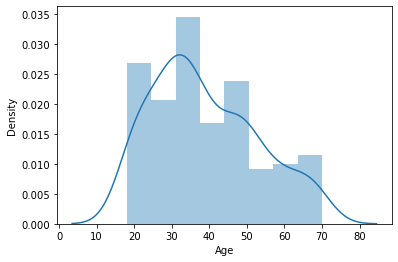

In [6]:
import seaborn as sns
sns.distplot(df.Age)

ii)BIVARIATE ANALYSIS

C:\Users\janan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

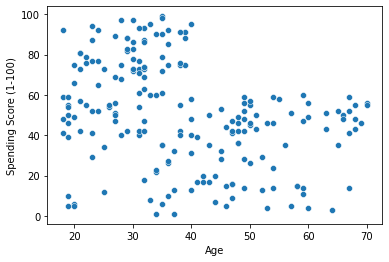

In [10]:
sns.scatterplot(df['Age'],df['Spending Score (1-100)'])

iii)MULTI-VARIATE ANALYSIS

C:\Users\janan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

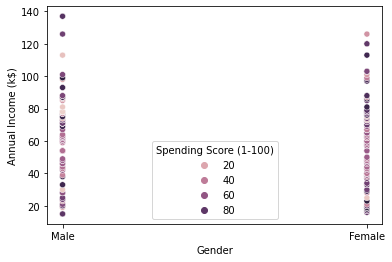

In [13]:
sns.scatterplot(df['Gender'],df['Annual Income (k$)'],df['Spending Score (1-100)'])

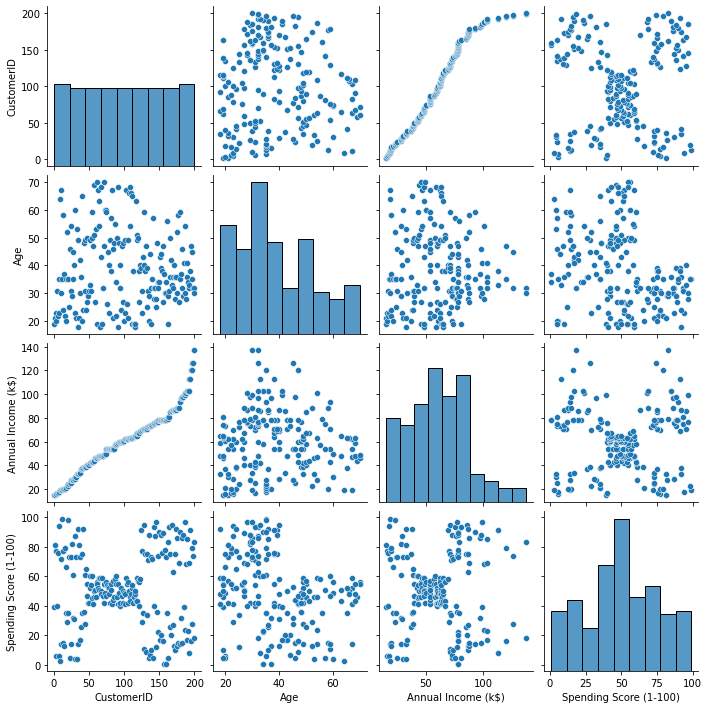

In [14]:
sns.pairplot(df)

# 4.PERFORM DESCRIPTIVE STATISTICS ON THE DATASET

In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 5.HANDLE THE MISSING VALUES

In [16]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [17]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 6.OUTLIERS AND THEIR REPLACEMENT

C:\Users\janan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(200, 5)

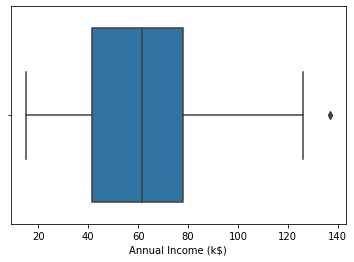

In [19]:
sns.boxplot(df['Annual Income (k$)'])
df.shape

C:\Users\janan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(200, 5)

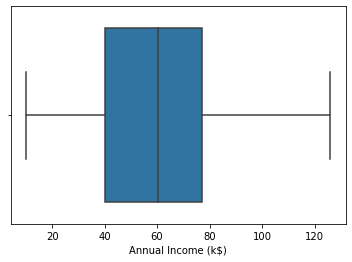

In [20]:
Q1=df['Annual Income (k$)'].quantile(0.25)
Q3=df['Annual Income (k$)'].quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_limit,10,df['Annual Income (k$)'])

sns.boxplot(df['Annual Income (k$)'])
df.shape

# 7.CHECK CATEGORICAL COLUMNS AND PERFORM ENCODING

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
df.Gender = le.fit_transform(df.Gender)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# 8.SCALING THE DATA(SCALE INDEPENDENT VARIABLE)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scale=MinMaxScaler()
X_scaled=pd.DataFrame(scale.fit_transform(df),columns=df.columns)
X_scaled

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.043103,0.387755
1,0.005025,1.0,0.057692,0.043103,0.816327
2,0.010050,0.0,0.038462,0.051724,0.051020
3,0.015075,0.0,0.096154,0.051724,0.775510
4,0.020101,0.0,0.250000,0.060345,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.948276,0.795918
196,0.984925,0.0,0.519231,1.000000,0.275510
197,0.989950,1.0,0.269231,1.000000,0.744898
198,0.994975,1.0,0.269231,0.000000,0.173469


# 9.PERFORM CLUSTERING ALGORITHM

In [27]:
from sklearn import cluster

In [29]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

C:\Users\janan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
error

[968615.9600000002,
 390418.01080108015,
 278259.2219461698,
 201530.69738247863,
 163408.4784845598,
 129357.58737938051,
 111866.00172390988,
 96405.88817750878,
 88332.8304715035,
 75512.42769133172]

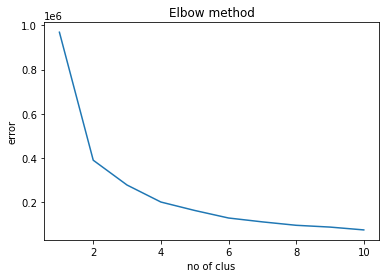

In [32]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [33]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [34]:
km_model.fit(df)

KMeans(n_clusters=3, random_state=0)

In [35]:
ykmeans =km_model.predict(df)
ykmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [46]:
km_model.predict([[1,1,19,15,39]])  ##prediction for random values

C:\Users\janan\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

# 10. ADDING CLUSTER DATA WITH THE  PRIMARY DATASET

In [47]:
df['kclus'] = pd.Series(ykmeans)

In [44]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


# 11. SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLE

In [48]:
X=df.iloc[:,:-1]
X   

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,10,18


In [50]:
y=df.kclus
y

0      0
1      0
2      0
3      0
4      0
      ..
195    2
196    2
197    2
198    2
199    2
Name: kclus, Length: 200, dtype: int32

# 12.SPLITTING THE DATA INTO TRAINING AND TESTING

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [73]:
X_train.shape

(140, 5)

In [74]:
X_test.shape

(60, 5)

In [75]:
y_train.shape

(140,)

In [76]:
y_test.shape

(60,)

# 13.BUILD THE MODEL

In [77]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier()

# 14.TRAIN THE MODEL

In [78]:
model.fit(X_train,y_train)

KNeighborsClassifier()

# 15.TEST THE MODEL

In [79]:
pred_test=model.predict(X_test)
pred_test

array([0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0,
       0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2])

In [80]:
pred_train=model.predict(X_train)
pred_train

array([1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1,
       0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 2, 0])

# 16.MEASURE THE PERFORMANCE USING EVALUATION METRICS

In [81]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [82]:
print('Training accuracy score: ',accuracy_score(y_train,pred_train))
print('Test accuracy score: ',accuracy_score(y_test,pred_test))

Training accuracy score:  0.9357142857142857
Test accuracy score:  0.9


In [83]:
pd.crosstab(y_test,pred_test)

col_0,0,1,2
kclus,,,
0,19,4,0
1,1,15,1
2,0,0,20


In [84]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.79      0.88      0.83        17
           2       0.95      1.00      0.98        20

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60

